In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sympy.ntheory import factorint

# Problem

Given an integer $n$ and $m$ sets $S_1, S_2, \dotsc, S_m$, how many different ways can we split up the prime factors of $n$ into the sets $S_1, S_2, \dotsc S_m$, where we allow empty sets (or equivalently assume all sets always contain 1)?

In particular, which integers less than some bound $N$ have the largest number of partitions for a fixed $m$?

This is related to [multiplicative partitions](https://en.wikipedia.org/wiki/Multiplicative_partition), but we constrain the number of partitions to a fixed number $m$.

## Case $m = 2$

In [2]:
def num_binary_partitions(n: int) -> int:
    """
    Computes the number of binary (m=2) partitions for an integer n.
    
    Given the prime factorization 
      n = p_1^e_1 * p_2^e_2 * ... * p_k^e_k
    the number of binary partitions is just
        (e_1 + 1) * (e_2 + 1) * ... * (e_k + 1)
    since for each prime factor p_{i,j} (i.e. including multiplicites) 
    we can choose whether or not p_{i,j} is in S_1
    """
    factors = factorint(n)
    return int(np.prod([e + 1 for e in factors.values()]))

def binary_partition_ranking(N: int) -> list[tuple[int, int]]:
    """
    Computes the number of binary partitions for all integers in [1, N]
    and returns a ranked list of such integers.
    """
    ranked = []
    for n in range(1, N+1):
        npart = num_binary_partitions(n)
        ranked.append((n, npart))
    return sorted(ranked, key=lambda p: -p[1])

In [3]:
N = 1000
ranked = binary_partition_ranking(N)
pd.DataFrame(ranked, columns=['n', 'npart'])

,n,npart
0,840,32
1,720,30
2,960,28
3,900,27
4,360,24
...,...,...
995,977,2
996,983,2
997,991,2
998,997,2


In [4]:
factorint(ranked[0][0])

{2: 3, 3: 1, 5: 1, 7: 1}

Intuitively, in order to maximize the number of binary partitions, we want to maximize the number of unique prime factors, since each will at double the total. 

In other words, $M\times2$ grows faster than $M\times\frac{e_i+2}{e_i+1}$ for $e_i > 0$, where $M$ is the current total and in the first case we are adding a new prime factor, and the second we are increasing the exponent of the $i$-th prime factor.

For example, $2^5 = 32$ has 6 partitions, but $2\times3\times5 = 30$ has $2^3 = 8$ partitions. 

However, we are constrained to numbers $n \le N$. So once we have found the largest number $n \le N$ with unique prime factors, the next best thing is to add factors of 2 to make keep $n$ as small as possible.

This explains why, for $N=1000$, the number with the most binary partitions is
$$
n = 840 = 2^3 \times 3 \times 5 \times 7
$$

In [5]:
def visualize_num_binary_partitions(N):
    xs = np.arange(1, N+1)
    ys = [ num_binary_partitions(i) for i in range(1, N+1) ]
    
    # Draw plot
    plt.scatter(xs, ys, s=5)
    plt.ylabel('npart')
    plt.xlabel('n')

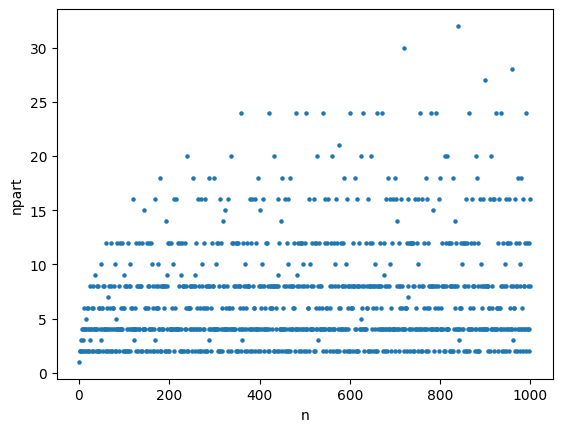

In [6]:
visualize_num_binary_partitions(1000)

A pattern of horizontal lines emerges:
- `npart = 1`: 1 is the only number that can only be partitioned in 1 way
- `npart = 2`: prime numbers
- `npart = 3`: squares of primes ($n=p^2$)
- `npart = 4`: products of 2 primes ($n=pq$) and cubes of primes ($n=p^3$)
- `npart = 5`: primes to the 4th power ($n=p^4$)
- `npart = 6`: numbers of the form $n=p^5$ and $n=pq^2$
- and so on...

This raises another question: given a number $n$ with $B$ binary partitions, what are the possible prime factorizations of $n$ (up to the primes themselves, we only care about the number of unique primes and their multiplicities)?

For example, if $B$ is itself prime, then $n = p^{B-1}$ (for some prime $p$) is the only possible prime factorization of $n$. This explains the gaps in the figure above for `npart = 11, 13, ...` since $2^{11} = 2048 > 1000$.

In [7]:
def visualize_max_binary_partitions(N):
    ranked = binary_partition_ranking(N)
    xs = np.arange(1, N+1)
    ys = np.zeros(N)
    
    # Build list of maximum binary paritions
    idx = 0
    for i in range(N-1, -1, -1):
        while (idx < N-1) and (ranked[idx][0] > i):
            idx += 1
        ys[i] = ranked[idx][0]
        
    # Draw plot
    plt.plot(xs, ys)
    plt.ylim(0, N)
    plt.xlim(0, N)
    plt.ylabel('n')
    plt.xlabel('N')
    
    # Add point labels
    unique, idxs = np.unique(ys, return_index=True)
    for x, y in zip(xs[idxs], ys[idxs]):
        label = f'{int(y)}'
        plt.annotate(label, # this is the text
                     (x,y), # these are the coordinates to position the label
                     textcoords="offset points", # how to position the text
                     xytext=(0,3), # distance from text to points (x,y)
                     ha='center') # horizontal alignment can be left, right or center

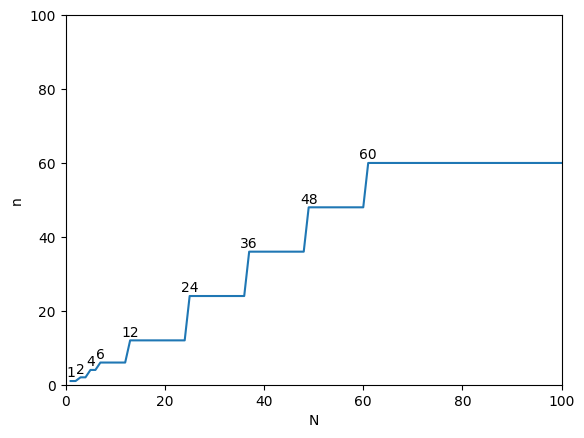

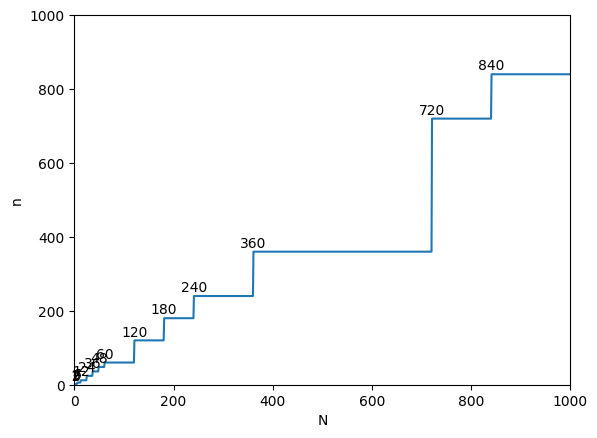

In [8]:
visualize_max_binary_partitions(100)
plt.figure()
visualize_max_binary_partitions(1000)

It's no coincidence that a circle has 360 degrees! 😉